In [103]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

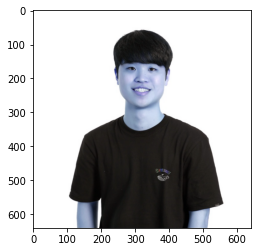

In [104]:
my_image_path = os.getenv('HOME')+'/aiffel/aiffel/explorations/03_camera_sticker/images/image.png'
img_bgr = cv2.resize(cv2.imread(my_image_path), (640, 640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

matplotlib, dlib 등의 이미지는 RGB 순으로 사용하는데, opencv는 예외적으로 BGR을 사용

그래서 원본 사진에서 붉은색->푸른색, 푸른색->붉은색

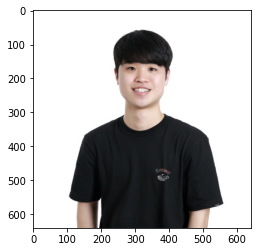

In [105]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

색상을 올바르게 출력하고 싶다면 `cv2.cvtColor` 메소드를 사용하여 BGR2RGB 진행

In [106]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print('인식한 얼굴 개수 :', len(dlib_rects))

인식한 얼굴 개수 : 1


num of img pyramid를 안주면 알아서 얼굴 개수를 detecting 해줌
detector_hog는 img pyramid개수를 반환하여 실제로 반복문을 돌려도 한번만 실행하는 것을 알 수 있음

In [ ]:
\_\_len\_\_이 구현이 되어있기 때문에 len(dilb_rects_cp)로 개수 확인할 수 있음

rectangles[[(253, 139) (382, 268)]]


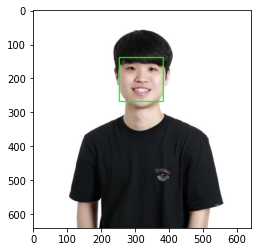

In [107]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

모든 얼굴들을 순회하며 얼굴로 인식된 사각형을 그려줍니다.

In [108]:
import os
model_path = os.getenv('HOME')+'/aiffel/aiffel/explorations/03_camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [109]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

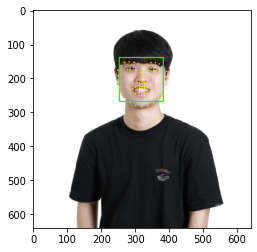

In [110]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

landmark로 인식한 곳에 점을 찍어줍니다.

In [111]:

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(320, 204)
(x,y) : (320,204)
(w,h) : (130,130)


x, y, w, h에 해당하는 각각의 좌표들을 찾아줍니다.

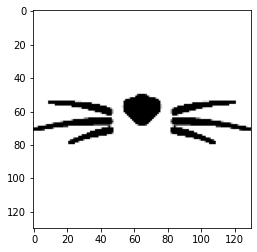

In [112]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/aiffel/explorations/03_camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker)

스티커 사이즈를 얼굴 크기에 맞게 조정합니다.

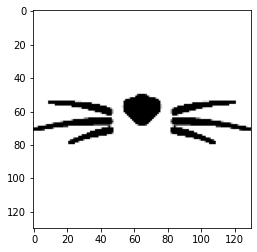

(130, 130, 3)


In [113]:
plt.imshow(img_sticker_rgb)
plt.show()
print (img_sticker.shape)

In [114]:
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (255,139)


In [115]:
if refined_y < 0:
  img_sticker = img_sticker[-refined_y:]
  print (img_sticker.shape)
  refined_y = 0
  print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [116]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

스티커 area만큼의 크기를 구한 이후, 이미지에 img_sticker를 삽입해줌

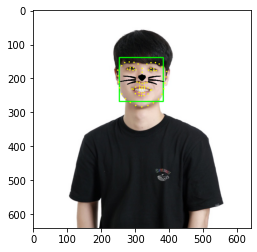

In [117]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [99]:
print(img_sticker.shape)

(130, 130, 3)


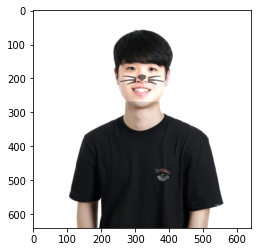

In [102]:
cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:+refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker==255).astype(np.uint8), 0.7, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()
